In [1]:
import h5py
import glob
import seaborn as sns
from ml4cvd.tensor_from_file import _mri_tensor_4d, _mri_hd5_to_structured_grids
from ml4cvd.defines import MRI_LAX_4CH_SEGMENTED_CHANNEL_MAP, MRI_LAX_3CH_SEGMENTED_CHANNEL_MAP, MRI_FRAMES
from ml4cvd.tensor_from_file import _mri_project_grids
from vtk.util import numpy_support as ns
import vtk
import numpy as np
import pandas as pd
import os
import imageio

In [ ]:
# hd5s = glob.glob('/mnt/disks/sax-lax-40k-lvm/2020-01-29/*.hd5')
# results = {f'dice_{d}': [] for d in range(MRI_FRAMES)}
# results['patientid'] = []

# for i, hd5 in enumerate(hd5s):
#     if i % 100 == 0 : print(i)
#     with h5py.File(hd5, 'r') as ff:
#         if 'ukb_cardiac_mri' not in ff:
#             continue
#         try:
#             ds_3ch = _mri_hd5_to_structured_grids(ff, 'cine_segmented_lax_3ch_annotated_', view_name='cine_segmented_lax_3ch', concatenate=True, save_path=None, order='F')
#             ds_4ch = _mri_hd5_to_structured_grids(ff, 'cine_segmented_lax_4ch_annotated_', view_name='cine_segmented_lax_4ch', concatenate=True, save_path=None, order='F')
#             ds_4ch_3ch = _mri_project_grids(ds_3ch, ds_4ch, 'cine_segmented_lax_3ch_annotated_')
#             ds_3ch_4ch = _mri_project_grids(ds_4ch, ds_3ch, 'cine_segmented_lax_4ch_annotated_')
#         except:
#             continue       
        
#         results['patientid'].append(hd5.split('/')[-1].replace('.hd5', ''))
#         for t in range(MRI_FRAMES):
#             arr_4onto3 = ns.vtk_to_numpy(ds_3ch_4ch[0].GetCellData().GetArray(f'cine_segmented_lax_4ch_annotated__projected_{t}'))
#             arr_3 = ns.vtk_to_numpy(ds_3ch_4ch[0].GetCellData().GetArray(f'cine_segmented_lax_3ch_annotated__{t}'))
#             arr_3onto4 = ns.vtk_to_numpy(ds_4ch_3ch[0].GetCellData().GetArray(f'cine_segmented_lax_3ch_annotated__projected_{t}'))
#             arr_4 = ns.vtk_to_numpy(ds_4ch_3ch[0].GetCellData().GetArray(f'cine_segmented_lax_4ch_annotated__{t}'))
#             cond1 = arr_4onto3 > 0
#             inters1 = np.sum(((arr_4onto3==MRI_LAX_4CH_SEGMENTED_CHANNEL_MAP['LA_cavity']) & cond1) & \
#                              ((arr_3==MRI_LAX_3CH_SEGMENTED_CHANNEL_MAP['left_atrium']) & cond1))
#             union1 = np.sum(((arr_4onto3==MRI_LAX_4CH_SEGMENTED_CHANNEL_MAP['LA_cavity']) & cond1) | \
#                             ((arr_3==MRI_LAX_3CH_SEGMENTED_CHANNEL_MAP['left_atrium']) & cond1))
#             cond2 = arr_3onto4 > 0
#             inters2 = np.sum(((arr_3onto4==MRI_LAX_3CH_SEGMENTED_CHANNEL_MAP['left_atrium']) & cond2) & \
#                              ((arr_4==MRI_LAX_4CH_SEGMENTED_CHANNEL_MAP['LA_cavity']) & cond2))
#             union2 = np.sum(((arr_3onto4==MRI_LAX_3CH_SEGMENTED_CHANNEL_MAP['left_atrium']) & cond2) | \
#                             ((arr_4==MRI_LAX_4CH_SEGMENTED_CHANNEL_MAP['LA_cavity']) & cond2))
#             results[f'dice_{t}'].append(np.mean([inters1/union1, inters2/union2]))

In [2]:
results_df = pd.concat([pd.read_csv(f'/home/pdiachil/intersected_mri_{i}.csv') for i in range(256) \
                        if os.path.isfile(f'/home/pdiachil/intersected_mri_{i}.csv')]).dropna()
results_df

,dice_0,dice_1,dice_2,dice_3,dice_4,dice_5,dice_6,dice_7,dice_8,dice_9,...,dice_41,dice_42,dice_43,dice_44,dice_45,dice_46,dice_47,dice_48,dice_49,patientid
0,0.788812,0.730202,0.731250,0.725610,0.766010,0.801108,0.806793,0.814520,0.794357,0.824505,...,0.906065,0.950725,0.945354,0.970378,0.927846,0.905983,0.940000,0.925753,0.861905,1000107
1,0.879142,0.864258,0.851236,0.853120,0.831683,0.839461,0.829488,0.839777,0.835678,0.848384,...,0.924844,0.939815,0.959500,0.971435,0.975438,0.941132,0.971311,0.952419,0.937061,1000169
2,0.848718,0.830411,0.805284,0.786573,0.804344,0.812767,0.816444,0.819898,0.833360,0.833360,...,0.824462,0.805556,0.903438,0.956860,0.961138,0.908909,0.932385,0.933715,0.884334,1000387
3,0.839044,0.882074,0.860825,0.867693,0.891889,0.875760,0.871184,0.839454,0.844663,0.844663,...,0.848029,0.846233,0.892045,0.893805,0.951363,0.934167,0.884780,0.916321,0.851852,1000426
4,0.865169,0.847485,0.831566,0.818182,0.813521,0.819349,0.823203,0.799887,0.816085,0.848729,...,0.925732,0.944255,0.944255,0.957937,0.895983,0.850385,0.858980,0.871320,0.836398,1000503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,0.846143,0.860352,0.880038,0.893314,0.945942,0.934516,0.920354,0.915254,0.927966,0.921826,...,0.949837,0.941854,0.918088,0.930657,0.883065,0.913043,0.816862,0.901786,0.861345,6025819
90,0.630392,0.623411,0.562052,0.622859,0.641096,0.774720,0.836279,0.811887,0.796600,0.796324,...,0.806593,0.846591,0.784554,0.725439,0.827922,0.887363,0.866680,0.810243,0.811471,6025888
91,0.866667,0.825688,0.875000,0.883697,0.884259,0.897321,0.891964,0.903670,0.888393,0.868993,...,0.961864,0.940678,0.961864,0.876093,0.869919,0.904760,0.871560,0.838095,0.846154,6025985
92,0.770577,0.800885,0.812500,0.845870,0.821739,0.829784,0.828519,0.885792,0.859715,0.820200,...,0.888447,0.884798,0.958815,0.910083,0.828276,0.849206,0.884442,0.814655,0.839432,6026159


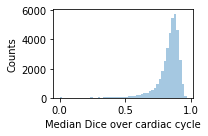

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
results_df['dice_median'] = np.median(results_df.values[:, :-1], axis=1)
f, ax = plt.subplots()
f.set_size_inches(3, 2)
sns.distplot(results_df['dice_median'], kde=False, ax=ax)
ax.set_xlabel('Median Dice over cardiac cycle',)
ax.set_ylabel('Counts')
plt.tight_layout()
f.savefig('dice_distribution.png', dpi=500)

In [ ]:
import matplotlib.animation as anim
import imageio
from IPython.display import HTML, Image
idxs = []
for i, idx in enumerate(results_df.sort_values(by='dice_median').patientid):
    idxs.append(idx)
    with h5py.File(f'/mnt/disks/sax-lax-40k-lvm/2020-01-29/{idx}.hd5') as ff:
        arr_3ch = _mri_tensor_4d(ff, 'cine_segmented_lax_3ch', dest_shape=[256, 256], concatenate=False)
        arr_4ch = _mri_tensor_4d(ff, 'cine_segmented_lax_4ch', dest_shape=[256, 256], concatenate=False)
        arr_annot_3ch = _mri_tensor_4d(ff, 'cine_segmented_lax_3ch_annotated_', concatenate=True)
        arr_annot_4ch = _mri_tensor_4d(ff, 'cine_segmented_lax_4ch_annotated_', concatenate=True)
        arr_annot_3ch_ma = np.ma.masked_array(data=arr_annot_3ch, 
                                              mask=(arr_annot_3ch != MRI_LAX_3CH_SEGMENTED_CHANNEL_MAP['left_atrium'])) 
        arr_annot_4ch_ma = np.ma.masked_array(data=arr_annot_4ch, 
                                              mask=(arr_annot_4ch != MRI_LAX_4CH_SEGMENTED_CHANNEL_MAP['LA_cavity']))
        f, ax = plt.subplots(1, 2)
        f.set_size_inches(16, 9)
        with imageio.get_writer(f'{idx}.gif', mode='I') as writer:
            for t in range(MRI_FRAMES):
                ax[0].imshow(arr_3ch[:, :, 0, t], cmap='gray')
                ax[0].imshow(arr_annot_3ch_ma[:, :, 0, t], alpha=0.5)
                ax[1].imshow(arr_4ch[:, :, 0, t], cmap='gray')
                ax[1].imshow(arr_annot_4ch_ma[:, :, 0, t], alpha=0.5)                
                f.suptitle(f"Patient: {idx}, Dice = {results_df.sort_values(by='dice_0')[f'dice_{t}'].values[i]}")
                f.savefig(f'tmp_{t}.png', dpi=50)
                image = imageio.imread(f'tmp_{t}.png')
                writer.append_data(image)                
        if i==10: break

In [ ]:
results_df.sort_values(by='dice_median').to_csv('dice_sores_3ch_4ch.tsv', sep='\t', index=False)

In [ ]:
from IPython.display import Image
movies = []
for idx in idxs:
    movies.append(Image(filename=f"{idx}.gif"))
display(*movies)

In [ ]:
idxs = []
for i, idx in enumerate(results_df.sort_values(by='dice_median', ascending=True).patientid):
    if i % (len(results_df)//10000) == 0:
        idxs.append(idx)
    if i > (len(results_df)//10): break

In [ ]:
len(idxs)

In [ ]:
for idx in idxs:
    with h5py.File(f'/mnt/disks/sax-lax-40k-lvm/2020-01-29/{idx}.hd5', 'r') as ff:
        arr_3ch = _mri_tensor_4d(ff, 'cine_segmented_lax_3ch', dest_shape=[256, 256], concatenate=False)
        arr_4ch = _mri_tensor_4d(ff, 'cine_segmented_lax_4ch', dest_shape=[256, 256], concatenate=False)
        arr_annot_3ch = _mri_tensor_4d(ff, 'cine_segmented_lax_3ch_annotated_', concatenate=True)
        arr_annot_4ch = _mri_tensor_4d(ff, 'cine_segmented_lax_4ch_annotated_', concatenate=True)
        arr_annot_3ch_ma = np.ma.masked_array(data=arr_annot_3ch, 
                                              mask=(arr_annot_3ch != MRI_LAX_3CH_SEGMENTED_CHANNEL_MAP['left_atrium'])) 
        arr_annot_4ch_ma = np.ma.masked_array(data=arr_annot_4ch, 
                                              mask=(arr_annot_4ch != MRI_LAX_4CH_SEGMENTED_CHANNEL_MAP['LA_cavity']))
        ds_3ch = _mri_hd5_to_structured_grids(ff, 'cine_segmented_lax_3ch_annotated_', view_name='cine_segmented_lax_3ch', concatenate=True, save_path=None, order='F')
        ds_4ch = _mri_hd5_to_structured_grids(ff, 'cine_segmented_lax_4ch_annotated_', view_name='cine_segmented_lax_4ch', concatenate=True, save_path=None, order='F')
        ds_3ch_4ch = _mri_project_grids(ds_3ch, ds_4ch, 'cine_segmented_lax_3ch_annotated_')
        ds_4ch_3ch = _mri_project_grids(ds_4ch, ds_3ch, 'cine_segmented_lax_4ch_annotated_')
        writer = vtk.vtkXMLStructuredGridWriter()
        writer.SetInputData(ds_3ch_4ch[0])
        writer.SetFileName(f'{idx}_3ch_4ch.vts')
        writer.Update()
        writer.SetInputData(ds_4ch_3ch[0])
        writer.SetFileName(f'{idx}_4ch_3ch.vts')
        writer.Update()
        f, ax = plt.subplots(1, 2)
        f.set_size_inches(8, 8)
        with imageio.get_writer(f"overlap_dice_{results_df[results_df['patientid']==idx][f'dice_median'].values[0]}_{idx}.gif", mode='I') as writer:
            for t in range(0, MRI_FRAMES, 10):
                arr_3_4 = ns.vtk_to_numpy(ds_3ch_4ch[0].GetCellData().GetArray(f'cine_segmented_lax_3ch_annotated__projected_{t}'))
                arr_3_4_ma = np.ma.masked_array(data=arr_3_4,
                                                mask=(arr_3_4 != MRI_LAX_3CH_SEGMENTED_CHANNEL_MAP['left_atrium']))
                arr_4_3 = ns.vtk_to_numpy(ds_4ch_3ch[0].GetCellData().GetArray(f'cine_segmented_lax_4ch_annotated__projected_{t}'))
                arr_4_3_ma = np.ma.masked_array(data=arr_4_3,
                                                mask=(arr_4_3 != MRI_LAX_4CH_SEGMENTED_CHANNEL_MAP['LA_cavity']))
                ax[0].imshow(arr_4ch[:, :, 0, t], cmap='gray')
                ax[0].imshow(arr_annot_4ch_ma[:, :, 0, t], alpha=0.5)
                ax[0].imshow(arr_3_4_ma.reshape(arr_annot_4ch_ma.shape[:2], order='F'), alpha=0.5, cmap='Reds') 
                ax[1].imshow(arr_3ch[:, :, 0, t], cmap='gray')
                ax[1].imshow(arr_annot_3ch_ma[:, :, 0, t], alpha=0.5)
                ax[1].imshow(arr_4_3_ma.reshape(arr_annot_3ch_ma.shape[:2], order='F'), alpha=0.5, cmap='Reds') 
                ax[0].set_title(f"Patient: {idx}")
                ax[1].set_title(f"Dice = {results_df[results_df['patientid']==idx][f'dice_{t}'].values}")
                f.savefig(f'overlap_{idx}_{t}.png', dpi=100)
                image = imageio.imread(f"overlap_{idx}_{t}.png")
                writer.append_data(image)       

In [ ]:
from IPython.display import Image
movies = []
for i, idx in enumerate(idxs[:50]):
    movies.append(Image(filename=f"overlap_{idx}.gif", width=1600, height=800))
display(*movies)

In [ ]:
def project_3dpts_plane(pts):
    N = np.cross(pts[10] - pts[0], pts[200] - pts[0])
    U = (pts[10] - pts[0])/np.linalg.norm(pts[10] - pts[0])
    uN = N / np.linalg.norm(N)
    u = pts[0] + U  
    V = np.cross(U, uN)
    v = pts[0] + V
    n = pts[0] + uN
    S = np.ones((4, 4))
    S[:-1, 0] = pts[0]
    S[:-1, 1] = u
    S[:-1, 2] = v
    S[:-1, 3] = n
    Sinv = np.linalg.inv(S)
    D = np.zeros((4, 4))
    D[-1] = 1
    D[0, 1] = 1
    D[1, 2] = 1
    D[2, 3] = 1
    M = np.dot(D, Sinv)
#     f, ax = plt.subplots()
#     ax = f.add_subplot(111, projection='3d')
#     ax.scatter(*pts[0])
#     ax.scatter(*v)
#     ax.scatter(*n)
#     ax.scatter(*u)
    pts_tmp = np.zeros((4, len(pts)))
    pts_tmp[:-1, :] = pts.T
    pts_tmp[-1] = 1
    return np.dot(M, pts_tmp)[:-1].T
    

In [ ]:
from scipy.spatial import ConvexHull
for idx in idxs:
    with h5py.File(f'/mnt/disks/sax-lax-40k-lvm/2020-01-29/{idx}.hd5', 'r') as ff:
#         arr_3ch = _mri_tensor_4d(ff, 'cine_segmented_lax_3ch', dest_shape=[256, 256], concatenate=False)
#         arr_4ch = _mri_tensor_4d(ff, 'cine_segmented_lax_4ch', dest_shape=[256, 256], concatenate=False)
#         arr_annot_3ch = _mri_tensor_4d(ff, 'cine_segmented_lax_3ch_annotated_', concatenate=True)
#         arr_annot_4ch = _mri_tensor_4d(ff, 'cine_segmented_lax_4ch_annotated_', concatenate=True)
#         arr_annot_3ch_ma = np.ma.masked_array(data=arr_annot_3ch, 
#                                               mask=(arr_annot_3ch != MRI_LAX_3CH_SEGMENTED_CHANNEL_MAP['left_atrium'])) 
#         arr_annot_4ch_ma = np.ma.masked_array(data=arr_annot_4ch, 
#                                               mask=(arr_annot_4ch != MRI_LAX_4CH_SEGMENTED_CHANNEL_MAP['LA_cavity']))
        ds_3ch = _mri_hd5_to_structured_grids(ff, 'cine_segmented_lax_3ch_annotated_', view_name='cine_segmented_lax_3ch', concatenate=True, save_path=None, order='F')
        ds_4ch = _mri_hd5_to_structured_grids(ff, 'cine_segmented_lax_4ch_annotated_', view_name='cine_segmented_lax_4ch', concatenate=True, save_path=None, order='F')
        
        centers_3ch = vtk.vtkCellCenters()
        centers_3ch.SetInputData(ds_3ch[0])
        centers_3ch.Update()
        centers_4ch = vtk.vtkCellCenters()
        centers_4ch.SetInputData(ds_4ch[0])
        centers_4ch.Update()
        for t in range(MRI_FRAMES):
            arr_annot_3ch = ns.vtk_to_numpy(ds_3ch[0].GetCellData().GetArray(f'cine_segmented_lax_3ch_annotated__{t}'))
            arr_annot_4ch = ns.vtk_to_numpy(ds_4ch[0].GetCellData().GetArray(f'cine_segmented_lax_4ch_annotated__{t}'))
            idx_3ch = np.where(arr_annot_3ch == MRI_LAX_3CH_SEGMENTED_CHANNEL_MAP['left_atrium'])
            idx_4ch = np.where(arr_annot_4ch == MRI_LAX_4CH_SEGMENTED_CHANNEL_MAP['LA_cavity'])
            pts_3ch = ns.vtk_to_numpy(centers_3ch.GetOutput().GetPoints().GetData())[idx_3ch]
            pts_3ch_2d = project_3dpts_plane(pts_3ch)
            n_3ch = np.cross(pts_3ch[10] - pts_3ch[0], pts_3ch[200] - pts_3ch[0])
            n_3ch /= np.linalg.norm(n_3ch)
            pts_4ch = ns.vtk_to_numpy(centers_4ch.GetOutput().GetPoints().GetData())[idx_4ch]
            pts_4ch_2d = project_3dpts_plane(pts_4ch)
            n_4ch = np.cross(pts_4ch[10] - pts_4ch[0], pts_4ch[200] - pts_4ch[0])
            n_4ch /= np.linalg.norm(n_4ch)
            hull_3ch = ConvexHull(pts_3ch_2d[:, :-1])
            hull_4ch = ConvexHull(pts_4ch_2d[:, :-1])
            pts_hull_3ch = pts_3ch[hull_3ch.vertices]
            pts_hull_4ch = pts_4ch[hull_4ch.vertices]
            pts1_hull_3ch = np.zeros_like(pts_hull_3ch)
            pts1_hull_4ch = np.zeros_like(pts_hull_4ch)
            pts1_hull_3ch[:-1] = pts_hull_3ch[1:]
            pts1_hull_3ch[-1] = pts_hull_3ch[0]
            pts1_hull_4ch[:-1] = pts_hull_4ch[1:]
            pts1_hull_4ch[-1] = pts_hull_4ch[0]
            n_hull_3ch = np.cross(pts1_hull_3ch-pts_hull_3ch, n_3ch)
            n_hull_3ch /= np.linalg.norm(n_hull_3ch, axis=1).reshape(-1, 1)
            n_hull_4ch = np.cross(pts1_hull_4ch-pts_hull_4ch, n_4ch)
            n_hull_4ch /= np.linalg.norm(n_hull_4ch, axis=1).reshape(-1, 1)
            n1_hull_3ch = np.zeros_like(n_hull_3ch)
            n1_hull_3ch[1:] = n_hull_3ch[:-1]
            n1_hull_3ch[0] = n_hull_3ch[-1]
            n_hull_3ch = -0.5*(n_hull_3ch + n1_hull_3ch)
            n1_hull_4ch = np.zeros_like(n_hull_4ch)
            n1_hull_4ch[1:] = n_hull_4ch[:-1]
            n1_hull_4ch[0] = n_hull_4ch[-1]
            n_hull_4ch = -0.5*(n_hull_4ch + n1_hull_4ch)       
            pts = np.vstack([pts_hull_3ch, pts_hull_4ch])
            normals = np.vstack([n_hull_3ch, n_hull_4ch])
            faces, vertices = poisson_reconstruction(pts, normals, depth=16)
            faces_tmp = np.zeros((len(faces), 4), dtype=np.int64)
            faces_tmp[:, 0] = 3
            faces_tmp[:, 1:] = faces 
            polydata_points = vtk.vtkPoints()
            polydata_points.SetData(ns.numpy_to_vtk(vertices))
            polydata_cells = vtk.vtkCellArray()
            polydata_cells.SetNumberOfCells(len(faces))
            polydata_cells.SetCells(len(faces), ns.numpy_to_vtkIdTypeArray(faces_tmp.ravel()))

            polydata = vtk.vtkPolyData()
            polydata.SetPoints(polydata_points)
            polydata.SetPolys(polydata_cells)
            
            writer = vtk.vtkXMLPolyDataWriter()
            writer.SetInputData(polydata)
            writer.SetFileName(f'atrium_{t}.vtp')
            writer.Update()
            break

        break

In [ ]:
for t in range(MRI_FRAMES):
    arr = ds_3ch[0].GetCellData().GetArray(f'cine_segmented_lax_3ch_annotated__{t}')
    if ds_3ch[0].GetCellData().GetArray('cine_segmented_lax_3ch_annotated') is not None:
        ds_3ch[0].GetCellData().RemoveArray('cine_segmented_lax_3ch_annotated')
    arr.SetName('cine_segmented_lax_3ch_annotated')
    ds_3ch[0].GetCellData().AddArray(arr)
    writer = vtk.vtkXMLStructuredGridWriter()
    writer.SetInputData(ds_3ch[0])
    writer.SetFileName(f'3ch_{t}.vts')
    writer.Update()
    
    arr = ds_4ch[0].GetCellData().GetArray(f'cine_segmented_lax_4ch_annotated__{t}')
    if ds_4ch[0].GetCellData().GetArray('cine_segmented_lax_4ch_annotated') is not None:
        ds_4ch[0].GetCellData().RemoveArray('cine_segmented_lax_4ch_annotated')
    arr.SetName('cine_segmented_lax_4ch_annotated')
    ds_4ch[0].GetCellData().AddArray(arr)
    writer = vtk.vtkXMLStructuredGridWriter()
    writer.SetInputData(ds_4ch[0])
    writer.SetFileName(f'4ch_{t}.vts')
    writer.Update()
    

In [ ]:
print(ds_3ch[0].GetCellData())

In [ ]:
%matplotlib inline
f, ax = plt.subplots()
ax = f.add_subplot(111, projection='3d')
ax.plot(pts_hull_4ch[:, 0], pts_hull_4ch[:, 1], pts_hull_4ch[:, 2])
#ax.plot(pts_hull_4ch[:, 0], pts_hull_4ch[:, 1], pts_hull_4ch[:, 2])
for pt, n  in zip(pts_hull_4ch, n_hull_4ch):
    ax.plot([pt[0], pt[0]+n[0]], 
            [pt[1], pt[1]+n[1]], 
            [pt[2], pt[2]+n[2]])

In [ ]:
from pypoisson import poisson_reconstruction
from mpl_toolkits.mplot3d import Axes3D

faces, vertices = poisson_reconstruction(pts, normals, depth=16)

faces_tmp = np.zeros((len(faces), 4), dtype=np.int64)
faces_tmp[:, 0] = 3
faces_tmp[:, 1:] = faces 
polydata_points = vtk.vtkPoints()
polydata_points.SetData(ns.numpy_to_vtk(vertices))
polydata_cells = vtk.vtkCellArray()
polydata_cells.SetNumberOfCells(len(faces))
polydata_cells.SetCells(len(faces), ns.numpy_to_vtkIdTypeArray(faces_tmp.ravel()))

polydata = vtk.vtkPolyData()
polydata.SetPoints(polydata_points)
polydata.SetPolys(polydata_cells)

f, ax = plt.subplots()
ax = f.add_subplot(111, projection='3d')
ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2])
ax.plot(pts_hull_3ch[:, 0], pts_hull_3ch[:, 1], pts_hull_3ch[:, 2])
ax.plot(pts_hull_4ch[:, 0], pts_hull_4ch[:, 1], pts_hull_4ch[:, 2])

In [ ]:
writer = vtk.vtkXMLPolyDataWriter()
writer.SetInputData(polydata)
writer.SetFileName('atrium.vtp')
writer.Update()

writer = vtk.vtkXMLStructuredGridWriter()
writer.SetInputData(ds_4ch[0])
writer.SetFileName('4ch.vts')
writer.Update()
writer.SetInputData(ds_3ch[0])
writer.SetFileName('3ch.vts')
writer.Update()


In [ ]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
f, ax = plt.subplots()
ax = f.add_subplot(111, projection='3d')
ax.scatter(pts_hull[:, 0], pts_hull[:, 1], pts_hull[:, 2])


In [ ]:
n = len(pts_hull)

D = np.zeros((10, n))
D[0, :] = pts_hull[:, 0]**2.0
D[1, :] = pts_hull[:, 1]**2.0
D[2, :] = pts_hull[:, 2]**2.0
D[3, :] = np.sqrt(2)*pts_hull[:, 0]*pts_hull[:, 1]
D[4, :] = np.sqrt(2)*pts_hull[:, 0]*pts_hull[:, 2]
D[5, :] = np.sqrt(2)*pts_hull[:, 1]*pts_hull[:, 2]
D[6, :] = pts_hull[:, 0]
D[7, :] = pts_hull[:, 1]
D[8, :] = pts_hull[:, 2]
D[9, :] = 1;

K = np.matmul(D, D.T)

## The objective is now to solve min <q,Kq>, ||q||=1
_, _, V1 = np.linalg.svd(K)
q = V1[:, 9]
q = q / np.sum(q[0:2]);
if q[0] < 0:
    q = -q

A = np.array([[q[0], q[3]/np.sqrt(2), q[4]/np.sqrt(2)],
              [q[3]/np.sqrt(2), q[2], q[5]/np.sqrt(2)],
              [q[4]/np.sqrt(2), q[5]/np.sqrt(2), q[2]]])

if np.min(np.linalg.eig(A)[0]) <= 0: 
    print('Beware, the LLS solution is not an ellipse')

b = [q[6], q[7], q[8]]
c = q[9]

In [ ]:
X, Y, Z = np.meshgrid(np.linspace(np.min(pts_hull[:, 0])-10, np.max(pts_hull[:, 0])+10, 200),
                      np.linspace(np.min(pts_hull[:, 1])-10, np.max(pts_hull[:, 1])+10, 200),
                      np.linspace(np.min(pts_hull[:, 2])-10, np.max(pts_hull[:, 2])+10, 200))

V = q[0]*X**2 + q[1]*Y**2 + q[2]*Z**2 + np.sqrt(2)*q[3]*X*Y + np.sqrt(2)*q[4]*X*Z + np.sqrt(2)*q[5]*Y*Z+\
    q[6]*X + q[7]*Y + q[8]*Z + q[9]



In [ ]:
from skimage import measure
verts, faces, _, _ = measure.marching_cubes_lewiner(V, 0, spacing=(2.0, 2.0, 2.0))

In [ ]:
faces.shape

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2],
                cmap='Spectral', lw=1)
ax.scatter(pts_hull[:, 0], pts_hull[:, 1], pts_hull[:, 2])

In [ ]:

#arr_3ch = _mri_tensor_4d(ff, 'cine_segmented_lax_3ch')

#arr_4ch = _mri_tensor_4d(ff, 'cine_segmented_lax_4ch')

In [ ]:
ds_3ch = _mri_hd5_to_structured_grids(ff, 'cine_segmented_lax_3ch_annotated_', view_name='cine_segmented_lax_3ch', concatenate=True, save_path=None, order='F')
ds_4ch = _mri_hd5_to_structured_grids(ff, 'cine_segmented_lax_4ch_annotated_', view_name='cine_segmented_lax_4ch', concatenate=True, save_path=None, order='F')

In [ ]:
from ml4cvd.tensor_from_file import _mri_project_grids
ds_4ch_3ch = _mri_project_grids(ds_3ch, ds_4ch, 'cine_segmented_lax_3ch_annotated_')
ds_3ch_4ch = _mri_project_grids(ds_4ch, ds_3ch, 'cine_segmented_lax_4ch_annotated_')

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 2)
ax[0].imshow(arr_annot_3ch[:, :, 0, 0]==2)
ax[1].imshow(arr_annot_4ch[:, :, 0, 0]==10)

In [ ]:
import vtk
from vtk.util import numpy_support as ns
writer = vtk.vtkXMLStructuredGridWriter()
writer.SetInputData(ds_4ch_3ch[0])
writer.SetFileName('3ch_to_4ch.vts')
writer.Update()
writer.SetInputData(ds_3ch_4ch[0])
writer.SetFileName('4ch_to_3ch.vts')
writer.Update()

In [ ]:
writer.SetInputData(ds_3ch[0])
writer.SetFileName('3ch.vts')
writer.Update()

In [ ]:
import numpy as np
for t in range(MRI_FRAMES):
    arr_4onto3 = ns.vtk_to_numpy(ds_3ch_4ch[0].GetCellData().GetArray(f'cine_segmented_lax_4ch_annotated__projected_{t}'))
    arr_3 = ns.vtk_to_numpy(ds_3ch_4ch[0].GetCellData().GetArray(f'cine_segmented_lax_3ch_annotated__{t}'))
    arr_3onto4 = ns.vtk_to_numpy(ds_4ch_3ch[0].GetCellData().GetArray(f'cine_segmented_lax_3ch_annotated__projected_{t}'))
    arr_4 = ns.vtk_to_numpy(ds_4ch_3ch[0].GetCellData().GetArray(f'cine_segmented_lax_4ch_annotated__{t}'))
    cond1 = arr_4onto3 > 0
    inters1 = np.sum(((arr_4onto3==MRI_LAX_4CH_SEGMENTED_CHANNEL_MAP['LA_cavity']) & cond1) & \
                     ((arr_3==MRI_LAX_3CH_SEGMENTED_CHANNEL_MAP['left_atrium']) & cond1))
    union1 = np.sum(((arr_4onto3==MRI_LAX_4CH_SEGMENTED_CHANNEL_MAP['LA_cavity']) & cond1) | \
                    ((arr_3==MRI_LAX_3CH_SEGMENTED_CHANNEL_MAP['left_atrium']) & cond1))
    cond2 = arr_3onto4 > 0
    inters2 = np.sum(((arr_3onto4==MRI_LAX_3CH_SEGMENTED_CHANNEL_MAP['left_atrium']) & cond2) & \
                     ((arr_4==MRI_LAX_4CH_SEGMENTED_CHANNEL_MAP['LA_cavity']) & cond2))
    union2 = np.sum(((arr_3onto4==MRI_LAX_3CH_SEGMENTED_CHANNEL_MAP['left_atrium']) & cond2) | \
                    ((arr_4==MRI_LAX_4CH_SEGMENTED_CHANNEL_MAP['LA_cavity']) & cond2))
    print(inters1/union1, inters2/union2)

In [ ]:
import numpy as np
cond1 = arr_4onto3 > 0
inters1 = np.sum(((arr_4onto3==MRI_LAX_4CH_SEGMENTED_CHANNEL_MAP['LA_cavity']) & cond1) & \
                 ((arr_3==MRI_LAX_3CH_SEGMENTED_CHANNEL_MAP['left_atrium']) & cond1))
union1 = np.sum(((arr_4onto3==MRI_LAX_4CH_SEGMENTED_CHANNEL_MAP['LA_cavity']) & cond1) | \
                ((arr_3==MRI_LAX_3CH_SEGMENTED_CHANNEL_MAP['left_atrium']) & cond1))

In [ ]:
cond2 = arr_3onto4 > 0
inters2 = np.sum(((arr_3onto4==MRI_LAX_3CH_SEGMENTED_CHANNEL_MAP['left_atrium']) & cond2) & \
                 ((arr_4==MRI_LAX_4CH_SEGMENTED_CHANNEL_MAP['LA_cavity']) & cond2))
union2 = np.sum(((arr_3onto4==MRI_LAX_3CH_SEGMENTED_CHANNEL_MAP['left_atrium']) & cond2) | \
                ((arr_4==MRI_LAX_4CH_SEGMENTED_CHANNEL_MAP['LA_cavity']) & cond2))

In [ ]:
print(inters1/union1, inters2/union2)

In [ ]:
arr_3onto3 = ns.vtk_to_numpy(ds_3ch_4ch[0].GetCellData().GetArray('cine_segmented_lax_4ch_annotated__projected_0'))
arr_3 = ns.vtk_to_numpy(ds_3ch_4ch[0].GetCellData().GetArray('cine_segmented_lax_3ch_annotated__0'))
arr_3onto4 = ns.vtk_to_numpy(ds_4ch_3ch[0].GetCellData().GetArray('cine_segmented_lax_3ch_annotated__projected_0'))
arr_4 = ns.vtk_to_numpy(ds_4ch_3ch[0].GetCellData().GetArray('cine_segmented_lax_4ch_annotated__0'))